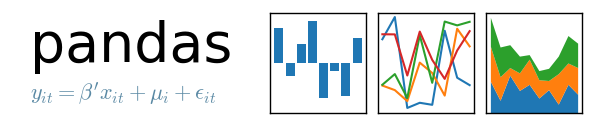

# `__init__`

In [1]:
import pandas as pd
import random, sys

In [2]:
# Just So we can log 
def printError(e): print("Error: {}".format(e), file=sys.stderr)

# TODO

* (10 m) https://youtu.be/WjEVJ4x2SXE?t=1228 datetime

# Talks
* "[How to use pandas the wrong way](https://www.youtube.com/watch?v=4JwpDGrMsJE)", by Pietro Battiston  @EuroPython 2017 (
[code](https://pietrobattiston.it/python:pycon)
)
* "[Neat Analytics with Pandas Indexes](https://www.youtube.com/watch?v=WjEVJ4x2SXE&)", by Alexander Hendorf @EuroPython 2017 (
  [slides](https://www.slideshare.net/PoleSystematicParisRegion/neat-analytics-with-pandas-indexes-alexander-hendorf)
)
* "[Data Wrangling & Visualization with Pandas and Jupyter](https://github.com/alanderex/pydata-pandas-workshop)", by Alexander Hendorf @EuroPython 2018

*  "[Pandas for Data Analysis](https://www.youtube.com/watch?v=oGzU688xCUs)" by Daniel Chen, @SciPy 2017 (
  [code](https://github.com/chendaniely/scipy-2017-tutorial-pandas)
)

## Docks

* https://pandas.pydata.org/pandas-docs/stable/reference/

# Books
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
* [Python Data Science](http://shop.oreilly.com/product/0636920034919.do)

# Getting Started with pandas

In [3]:
pd.__version__

'0.24.1'

## Pandas Data Structures

Types:
* `np.bool` (`bool`) - Stored as a single byte.
* `np.int` (`int`) - Defaulted to 64 bits, Unsigned ints is alaso available (`np.uint`)
* `np.float` (`float`) - Defaulted to 64 bits.
* `np.complex` (`complex`) - Rarely seen in DA
* `np.object` (`O`, `object`) - Typically strings but is a catch- all for columns with multiple different types or other Python objects (tuples, lists, dicts, and so on).
* `np.datetime64`, `pd.Timestamp` (`datetime64`) - Specific moment in time with nanosecond precision.
* `np.timedelta64`,`pd.Timedelta` (`timedelta64`) - An amount of time, from days to nanoseconds.
* `pd.Categorical` (`Categorical`) - Specific only to pandas. Useful for object columns with relatively few unique values.

In [4]:
df = pd.read_csv('data/titanic.csv')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [5]:
df.get_dtype_counts()

float64    2
int64      4
bool       2
object     7
dtype: int64

In [6]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

### numpy.ndarray

See `numpy` notes.

### Series

This is num py array with labels

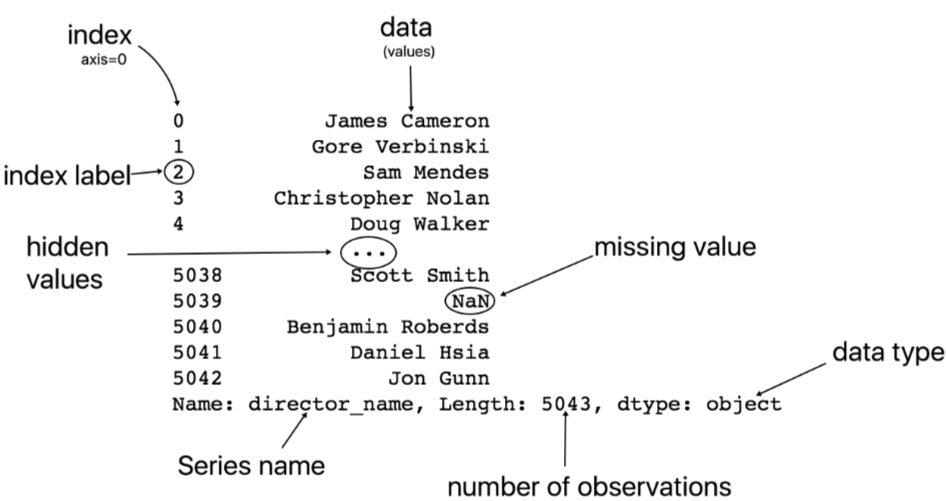

In [7]:
s = pd.Series([random.randint(0,9) for x in range(26)])
s

0     2
1     2
2     6
3     3
4     3
5     8
6     5
7     8
8     3
9     0
10    1
11    4
12    8
13    8
14    3
15    5
16    9
17    2
18    0
19    0
20    7
21    5
22    5
23    1
24    1
25    6
dtype: int64

In [8]:
# what is this s object?
type(s)

pandas.core.series.Series

In [9]:
s.shape

(26,)

In [10]:
s.index

RangeIndex(start=0, stop=26, step=1)

In [11]:
s.value_counts( normalize=True )

8    0.153846
5    0.153846
3    0.153846
2    0.115385
1    0.115385
0    0.115385
6    0.076923
9    0.038462
7    0.038462
4    0.038462
dtype: float64

In [12]:
s.hasnans

False

### DataFrames

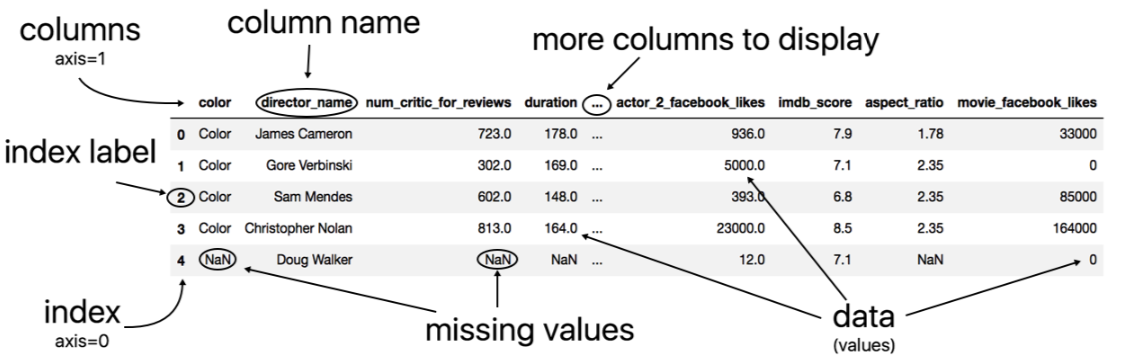

In [13]:
df = pd.read_csv('data/titanic.csv')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [14]:
# what is this df object?
type(df)

pandas.core.frame.DataFrame

In [15]:
# values -> row
df.values[0]

array([0, 3, 'male', 22.0, 1, 0, 7.25, 'S', 'Third', 'man', True, nan,
       'Southampton', 'no', False], dtype=object)

In [16]:
type(df.values)

numpy.ndarray

In [17]:
# get num rows and columns
df.shape

(891, 15)

In [18]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [19]:
type(df.columns)

pandas.core.indexes.base.Index

In [20]:
# general info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [21]:
# access using index
df["sex"].head(2)

0      male
1    female
Name: sex, dtype: object

In [22]:
# access using property
df.sex.head(2)

0      male
1    female
Name: sex, dtype: object

### Index

indexes simular to np.arrays but immutable by its nature.

In [23]:
# manualy created index
indexes=pd.Index([0,1,2,3,4,5,6])

In [24]:
indexes.size, indexes.shape, indexes.dtype

(7, (7,), dtype('int64'))

indexes supports set operations

In [25]:
# intersection
pd.Index([1,2,3,4]) & pd.Index([3,4,5,6])

Int64Index([3, 4], dtype='int64')

In [26]:
# union.
pd.Index([1,2,3,4]) | pd.Index([3,4,5,6])

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

In [27]:
# symetric difference
pd.Index([1,2,3,4]) ^ pd.Index([3,4,5,6])

Int64Index([1, 2, 5, 6], dtype='int64')

## Handling Missing Data

In [28]:
df = pd.read_csv('data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [29]:
# some of the data is nill
df['age'].isnull().sum()

177

In [30]:
df['age'].fillna(0).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [31]:
df['age'].isnull().sum()

177

In [32]:
df['age'].dropna( inplace=True )

In [33]:
df['age'].isnull().sum()

0

In [34]:
df['deck'].hasnans

True

In [35]:
df['deck'].notnull()

0      False
1       True
2      False
3       True
4      False
5      False
6       True
7      False
8      False
9      False
10      True
11      True
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23      True
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
861    False
862     True
863    False
864    False
865    False
866    False
867     True
868    False
869    False
870    False
871     True
872     True
873    False
874    False
875    False
876    False
877    False
878    False
879     True
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887     True
888    False
889     True
890    False
Name: deck, Length: 891, dtype: bool

In [36]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Hierarchical Indexing

In [37]:
s = pd.Series(range(26))

In [38]:
# relabeling
s.index = [x for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'][:len(s)]

In [39]:
s[3:9]

D    3
E    4
F    5
G    6
H    7
I    8
dtype: int64

In [40]:
s["D":"I"]

D    3
E    4
F    5
G    6
H    7
I    8
dtype: int64

In [41]:
# Pythons indexing
s.iloc[3:9]

D    3
E    4
F    5
G    6
H    7
I    8
dtype: int64

In [42]:
# duplicates in labels
s.index = [x for x in 'GATTACAHIJKLMNOPQRSTUVWXYZ'][:len(s)]

In [43]:
s.loc['G']

0

In [44]:
# Requesting non uniq values
try:
    s.loc['G':'A']
except KeyError as e:
    printError(e)

Error: "Cannot get right slice bound for non-unique label: 'A'"


In [45]:
# Uniq Labels
s.loc['X':'Z']

X    23
Y    24
Z    25
dtype: int64

----

In [46]:
df = pd.read_csv('data/titanic.csv')

In [47]:
df.loc[[0], :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [48]:
df.loc[[0], ['sex', 'age', 'class']]

,sex,age,class
0,male,22.0,Third


In [49]:
df.loc[0:3, ['sex', 'age', 'class']]

,sex,age,class
0,male,22.0,Third
1,female,38.0,First
2,female,26.0,Third
3,female,35.0,First


In [50]:
pd.concat([
    df.loc[0:3, ['sex', 'age', 'class']],
    df.loc[10:13, ['sex', 'age', 'class']],
])

,sex,age,class
0,male,22.0,Third
1,female,38.0,First
2,female,26.0,Third
3,female,35.0,First
10,female,4.0,Third
11,female,58.0,First
12,male,20.0,Third
13,male,39.0,Third


In [51]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
df.set_index('survived', inplace=True)
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,,,,,,,,,,,,,,
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
# restoring index (and putting column at the begining of dataframe)
df = df.reset_index()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Rows

`df.loc` label based indexing

In [54]:
# first THREE rows
df.loc[0:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [55]:
# first three row
df[["sex"]].loc[0].to_dict() 

{'sex': 'male'}

In [56]:
# But normal "Python" way wouldn't work, not with `loc`
try: 
    df.loc[-1]
except KeyError as e:
    printError(e)

Error: -1


`df.iloc` uses positional indexing

In [57]:
df.iloc[0:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [58]:
# first row
df[["sex"]].iloc[0].to_dict()

{'sex': 'male'}

In [59]:
df.iloc[[0,1,2]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [60]:
# last element using indexing
df[["sex"]].iloc[-1].to_dict()

{'sex': 'male'}

### Columns

In [61]:
df[["sex", "age", "survived"]].head(3)

,sex,age,survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1


In [62]:
# logical selection of one column
df.loc[(df.sex == 'male'), 'survived'].head()

0    0
4    0
5    0
6    0
7    0
Name: survived, dtype: int64

In [63]:
# or show selection of two columns
df.loc[(df.sex == 'male'), [ 'survived', 'embarked' ]].head()

,survived,embarked
0,0,S
4,0,S
5,0,Q
6,0,S
7,0,S


In [64]:
# or show all
df.loc[(df.sex == 'male'), :].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [65]:
# not providing columns info at all!
df.loc[(df.sex == 'male')].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [66]:
# subselection based on own data.
df.loc[df.age > df.age.mean(), :].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


### Indexes

In [67]:
df = pd.DataFrame([[random.randint(0, 9) for x in range(10)] for x in range(10)])
df

,0,1,2,3,4,5,6,7,8,9
0,2,6,9,3,6,4,8,0,6,4
1,1,1,4,4,4,8,5,5,1,2
2,5,2,9,1,9,4,4,5,1,7
3,4,9,4,6,0,9,5,7,1,0
4,7,4,4,5,0,3,4,2,0,7
5,3,4,3,9,0,4,5,9,3,5
6,1,1,4,1,9,5,8,9,4,5
7,6,3,5,1,4,7,8,5,4,7
8,0,1,5,7,0,0,5,4,3,4
9,7,3,2,9,6,7,8,1,1,1


In [68]:
# Columns
df[2]

0    9
1    4
2    9
3    4
4    4
5    3
6    4
7    5
8    5
9    2
Name: 2, dtype: int64

In [69]:
# rows!
df[2:4]

,0,1,2,3,4,5,6,7,8,9
2,5,2,9,1,9,4,4,5,1,7
3,4,9,4,6,0,9,5,7,1,0


In [70]:
df.iloc[2:4, 5:6]

,5
2,4
3,9


In [71]:
df.iloc[:, 5:6]

,5
0,4
1,8
2,4
3,9
4,3
5,4
6,5
7,7
8,0
9,7


In [72]:
# relabeling
df.index = ["R{:02d}".format(x) for x in range(len(df)) ]
df.columns = ["C{:02d}".format(x) for x in range(len(df.columns)) ]

df

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R00,2,6,9,3,6,4,8,0,6,4
R01,1,1,4,4,4,8,5,5,1,2
R02,5,2,9,1,9,4,4,5,1,7
R03,4,9,4,6,0,9,5,7,1,0
R04,7,4,4,5,0,3,4,2,0,7
R05,3,4,3,9,0,4,5,9,3,5
R06,1,1,4,1,9,5,8,9,4,5
R07,6,3,5,1,4,7,8,5,4,7
R08,0,1,5,7,0,0,5,4,3,4
R09,7,3,2,9,6,7,8,1,1,1


In [73]:
df['C05']

R00    4
R01    8
R02    4
R03    9
R04    3
R05    4
R06    5
R07    7
R08    0
R09    7
Name: C05, dtype: int64

In [74]:
df['C05':'C09']

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09


In [75]:
df['R05':'R06']

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R05,3,4,3,9,0,4,5,9,3,5
R06,1,1,4,1,9,5,8,9,4,5


### MultiIndexes

In [76]:
pdlen = 20

df = pd.DataFrame(
    {
        'city'     : [x for x in ['Paris', 'London', 'Berlin', 'Manchester', 'Kyiv']*10][:pdlen],
        'category' : [random.randint(0, 7) for x in range(pdlen)],
        'price'    : [random.randint(10, 300) for x in range(pdlen)],
        'rating'   : [random.randint(0, 5) for x in range(pdlen)],
    }
)

df['country'] = df['city'].map({
    'Paris':'FR', 'London':'UK', 'Berlin':'DE', 'Manchester':'US', 'Kyiv':'UA',
})

df

,city,category,price,rating,country
0,Paris,4,80,0,FR
1,London,1,262,5,UK
2,Berlin,3,243,4,DE
3,Manchester,3,293,5,US
4,Kyiv,3,266,4,UA
5,Paris,0,231,5,FR
6,London,4,251,4,UK
7,Berlin,4,118,0,DE
8,Manchester,3,237,4,US
9,Kyiv,1,70,1,UA


In [77]:
dfg = df.groupby(['country', 'city', 'category']).mean()
dfg

price  rating
country city       category                    
DE      Berlin     0         131.000000     3.0
                   3         243.000000     4.0
                   4         118.000000     0.0
                   7          18.000000     4.0
FR      Paris      0         231.000000     5.0
                   1         231.000000     1.0
                   4          80.000000     0.0
                   7         114.000000     5.0
UA      Kyiv       1          70.000000     1.0
                   3         266.000000     4.0
                   4          88.500000     4.0
UK      London     1         248.500000     3.5
                   4         251.000000     4.0
                   7         129.000000     1.0
US      Manchester 0         226.000000     1.0
                   3         220.333333     4.0

In [78]:
# show all indexes
dfg.index

MultiIndex(levels=[['DE', 'FR', 'UA', 'UK', 'US'], ['Berlin', 'Kyiv', 'London', 'Manchester', 'Paris'], [0, 1, 3, 4, 7]],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4], [0, 0, 0, 0, 4, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3], [0, 2, 3, 4, 0, 1, 3, 4, 1, 2, 3, 1, 3, 4, 0, 2]],
           names=['country', 'city', 'category'])

In [79]:
#show levels
dfg.index.levels

FrozenList([['DE', 'FR', 'UA', 'UK', 'US'], ['Berlin', 'Kyiv', 'London', 'Manchester', 'Paris'], [0, 1, 3, 4, 7]])

In [80]:
#
dfg.index.names

FrozenList(['country', 'city', 'category'])

In [81]:
dfg.index.values

array([('DE', 'Berlin', 0), ('DE', 'Berlin', 3), ('DE', 'Berlin', 4),
       ('DE', 'Berlin', 7), ('FR', 'Paris', 0), ('FR', 'Paris', 1),
       ('FR', 'Paris', 4), ('FR', 'Paris', 7), ('UA', 'Kyiv', 1),
       ('UA', 'Kyiv', 3), ('UA', 'Kyiv', 4), ('UK', 'London', 1),
       ('UK', 'London', 4), ('UK', 'London', 7), ('US', 'Manchester', 0),
       ('US', 'Manchester', 3)], dtype=object)

In [82]:
dfg.index.get_level_values(2)

Int64Index([0, 3, 4, 7, 0, 1, 4, 7, 1, 3, 4, 1, 4, 7, 0, 3], dtype='int64', name='category')

In [83]:
dfg.loc["UA"]

price  rating
city category               
Kyiv 1          70.0     1.0
     3         266.0     4.0
     4          88.5     4.0

In [84]:
dfg.loc["UA", "Kyiv"].max()

price     266.0
rating      4.0
dtype: float64

In [85]:
dfg.loc["UA", "Kyiv", 0:4]

price  rating
country city category               
UA      Kyiv 1          70.0     1.0
             3         266.0     4.0
             4          88.5     4.0

In [86]:
# rename
dfg.rename(index={'UA':'ЮА'}, columns={'price':'Precio'})

Precio  rating
country city       category                    
DE      Berlin     0         131.000000     3.0
                   3         243.000000     4.0
                   4         118.000000     0.0
                   7          18.000000     4.0
FR      Paris      0         231.000000     5.0
                   1         231.000000     1.0
                   4          80.000000     0.0
                   7         114.000000     5.0
ЮА      Kyiv       1          70.000000     1.0
                   3         266.000000     4.0
                   4          88.500000     4.0
UK      London     1         248.500000     3.5
                   4         251.000000     4.0
                   7         129.000000     1.0
US      Manchester 0         226.000000     1.0
                   3         220.333333     4.0

# Data Loading, Storage, and File Formats

## Reading and Writing Data in Text Format

Reading data

In [87]:
df = pd.read_csv('data/titanic.csv')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [88]:
# show ing last records simular to tail command
df.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Writing data:

* `df.to_feather('file.feather')`
* `df.to_csv('file.csv')`

In [89]:
# save to comaseparated values file
df.to_csv("file.csv")

In [90]:
# checking file
!head file.csv

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
5,0,3,male,,0,0,8.4583,Q,Third,man,True,,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.075,S,Third,child,False,,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,,Southampton,yes,False


In [91]:
# cleanup
!unlink file.csv

## Binary Data Formats

## Interacting with HTML and Web APIs

## Interacting with Databases

# Data Wrangling: Clean, Transform, Merge, Reshape

## Deleting Columns

In [92]:
df = pd.read_csv('data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [93]:
try:
    del df['embark_town'] 
except KeyError as e:
    printError(e)

In [94]:
try:
    df.drop(['fare'], axis=1, inplace=True)
except KeyError as e:
    printError(e)

In [95]:
# no error message - thanks to ignore errors
try:
    df.drop(['fare'], axis=1, errors="ignore", inplace=True)
except KeyError as e:
    printError(e)

In [96]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,S,Third,man,True,NaN,no,False
1,1,1,female,38.0,1,0,C,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,S,Third,woman,False,NaN,yes,True
3,1,1,female,35.0,1,0,S,First,woman,False,C,yes,False
4,0,3,male,35.0,0,0,S,Third,man,True,NaN,no,True


## Combining and Merging Data Sets

In [97]:
df = pd.DataFrame([[random.randint(0, 9) for x in range(5)] for x in range(5)])

# relabeling
df.index = ["R{:02d}".format(x) for x in range(len(df)) ]
df.columns = ["C{:02d}".format(x) for x in range(len(df.columns)) ]

df

,C00,C01,C02,C03,C04
R00,1,9,0,6,1
R01,3,8,9,0,5
R02,6,4,2,7,4
R03,8,9,7,5,1
R04,9,0,5,8,8


In [98]:
add_df = pd.Series([random.randint(0,10) for x in range(5)], index=["R{:02d}".format(x) for x in range(3, len(df)+3)])
add_df

R03     2
R04     9
R05     6
R06    10
R07     1
dtype: int64

In [99]:
add_df.name="C05"
add_df

R03     2
R04     9
R05     6
R06    10
R07     1
Name: C05, dtype: int64

In [100]:
df['C05'] = add_df

**WARNING**: Be careful with datatypes (NaN values are float, so the other non NAN values).

In [101]:
df

,C00,C01,C02,C03,C04,C05
R00,1,9,0,6,1,NaN
R01,3,8,9,0,5,NaN
R02,6,4,2,7,4,NaN
R03,8,9,7,5,1,2.0
R04,9,0,5,8,8,9.0


In [102]:
df.drop('C05', axis=1, errors="ignore", inplace=True)

### Concat

In [103]:
# pd.concat({})

### Joins

In [104]:
df.join(pd.DataFrame(add_df), how="outer")

,C00,C01,C02,C03,C04,C05
R00,1.0,9.0,0.0,6.0,1.0,NaN
R01,3.0,8.0,9.0,0.0,5.0,NaN
R02,6.0,4.0,2.0,7.0,4.0,NaN
R03,8.0,9.0,7.0,5.0,1.0,2.0
R04,9.0,0.0,5.0,8.0,8.0,9.0
R05,NaN,NaN,NaN,NaN,NaN,6.0
R06,NaN,NaN,NaN,NaN,NaN,10.0
R07,NaN,NaN,NaN,NaN,NaN,1.0


In [105]:
# inner join
df.join(pd.DataFrame(add_df), how="inner")

,C00,C01,C02,C03,C04,C05
R03,8,9,7,5,1,2
R04,9,0,5,8,8,9


In [106]:
# inner join
df.join(pd.DataFrame(add_df), how="left")

,C00,C01,C02,C03,C04,C05
R00,1,9,0,6,1,NaN
R01,3,8,9,0,5,NaN
R02,6,4,2,7,4,NaN
R03,8,9,7,5,1,2.0
R04,9,0,5,8,8,9.0


In [107]:
# inner join
df.join(pd.DataFrame(add_df), how="right")

,C00,C01,C02,C03,C04,C05
R03,8.0,9.0,7.0,5.0,1.0,2
R04,9.0,0.0,5.0,8.0,8.0,9
R05,NaN,NaN,NaN,NaN,NaN,6
R06,NaN,NaN,NaN,NaN,NaN,10
R07,NaN,NaN,NaN,NaN,NaN,1


## Reshaping and Pivoting

## Data Transformation

## String Manipulation

# Plotting and Visualization

# Data Aggregation and Group Operations

## GroupBy Mechanics

Look at all the cool things dataframes and series objects can do!

- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

In [108]:
df = pd.read_csv('data/titanic.csv')

In [109]:
df.groupby(['sex', 'age'])['class'].head()

0       Third
1       First
2       Third
3       First
4       Third
5       Third
6       First
7       Third
8       Third
9      Second
10      Third
11      First
12      Third
13      Third
14      Third
15     Second
16      Third
17     Second
18      Third
19      Third
20     Second
21     Second
22      Third
23      First
24      Third
25      Third
26      Third
27      First
28      Third
30      First
        ...  
795    Second
796     First
802     First
803     Third
813     Third
814     Third
816     Third
818     Third
819     Third
820     First
823     Third
824     Third
827    Second
829     First
830     Third
831    Second
835     First
843     Third
850     Third
851     Third
852     Third
854    Second
860     Third
862     First
865    Second
869     Third
871     First
875     Third
879     First
880    Second
Name: class, Length: 477, dtype: object

In [110]:
df.groupby(['sex', 'age'])['fare', 'class', 'who'].head()

,fare,class,who
0,7.2500,Third,man
1,71.2833,First,woman
2,7.9250,Third,woman
3,53.1000,First,woman
4,8.0500,Third,man
5,8.4583,Third,man
6,51.8625,First,man
7,21.0750,Third,child
8,11.1333,Third,woman
9,30.0708,Second,child


## Data Aggregation

## Group-wise Operations and Transformations

## Pivot Tables and Cross-Tabulation

# Time Series

## Date and Time Data Types and Tools

## Time Series Basics

## Date Ranges, Frequencies, and Shifting

## Time Zone Handling

## Periods and Period Arithmetic

## Resampling and Frequency Conversion

## Time Series Plotting

## Moving Window Functions

## Performance and Memory Usage Notes

### Loops

Loops mesurment from "How not to use pandas" talk.

In [111]:
# series 
s = pd.Series(range(10000))
# list
l = list(s)

Runnig Series of tests to find out actual speed of pandas itteration.

In [112]:
# Panda's Time Series
%timeit -n 1 -r 1 [s.iloc[i] for i in range(len(s))]

153 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [113]:
# Python's list
%timeit -n 1 -r 1 [l[i] for i in range(len(l))]

1.21 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [114]:
# Pandas - accesing lst element
%timeit -n 1 -r 1 s.iloc[-1:]

228 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [115]:
# List - accesing lst element
%timeit -n 1 -r 1 l[-1:]

1.26 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
